In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
wine=pd.read_csv("winequality-red.csv")

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


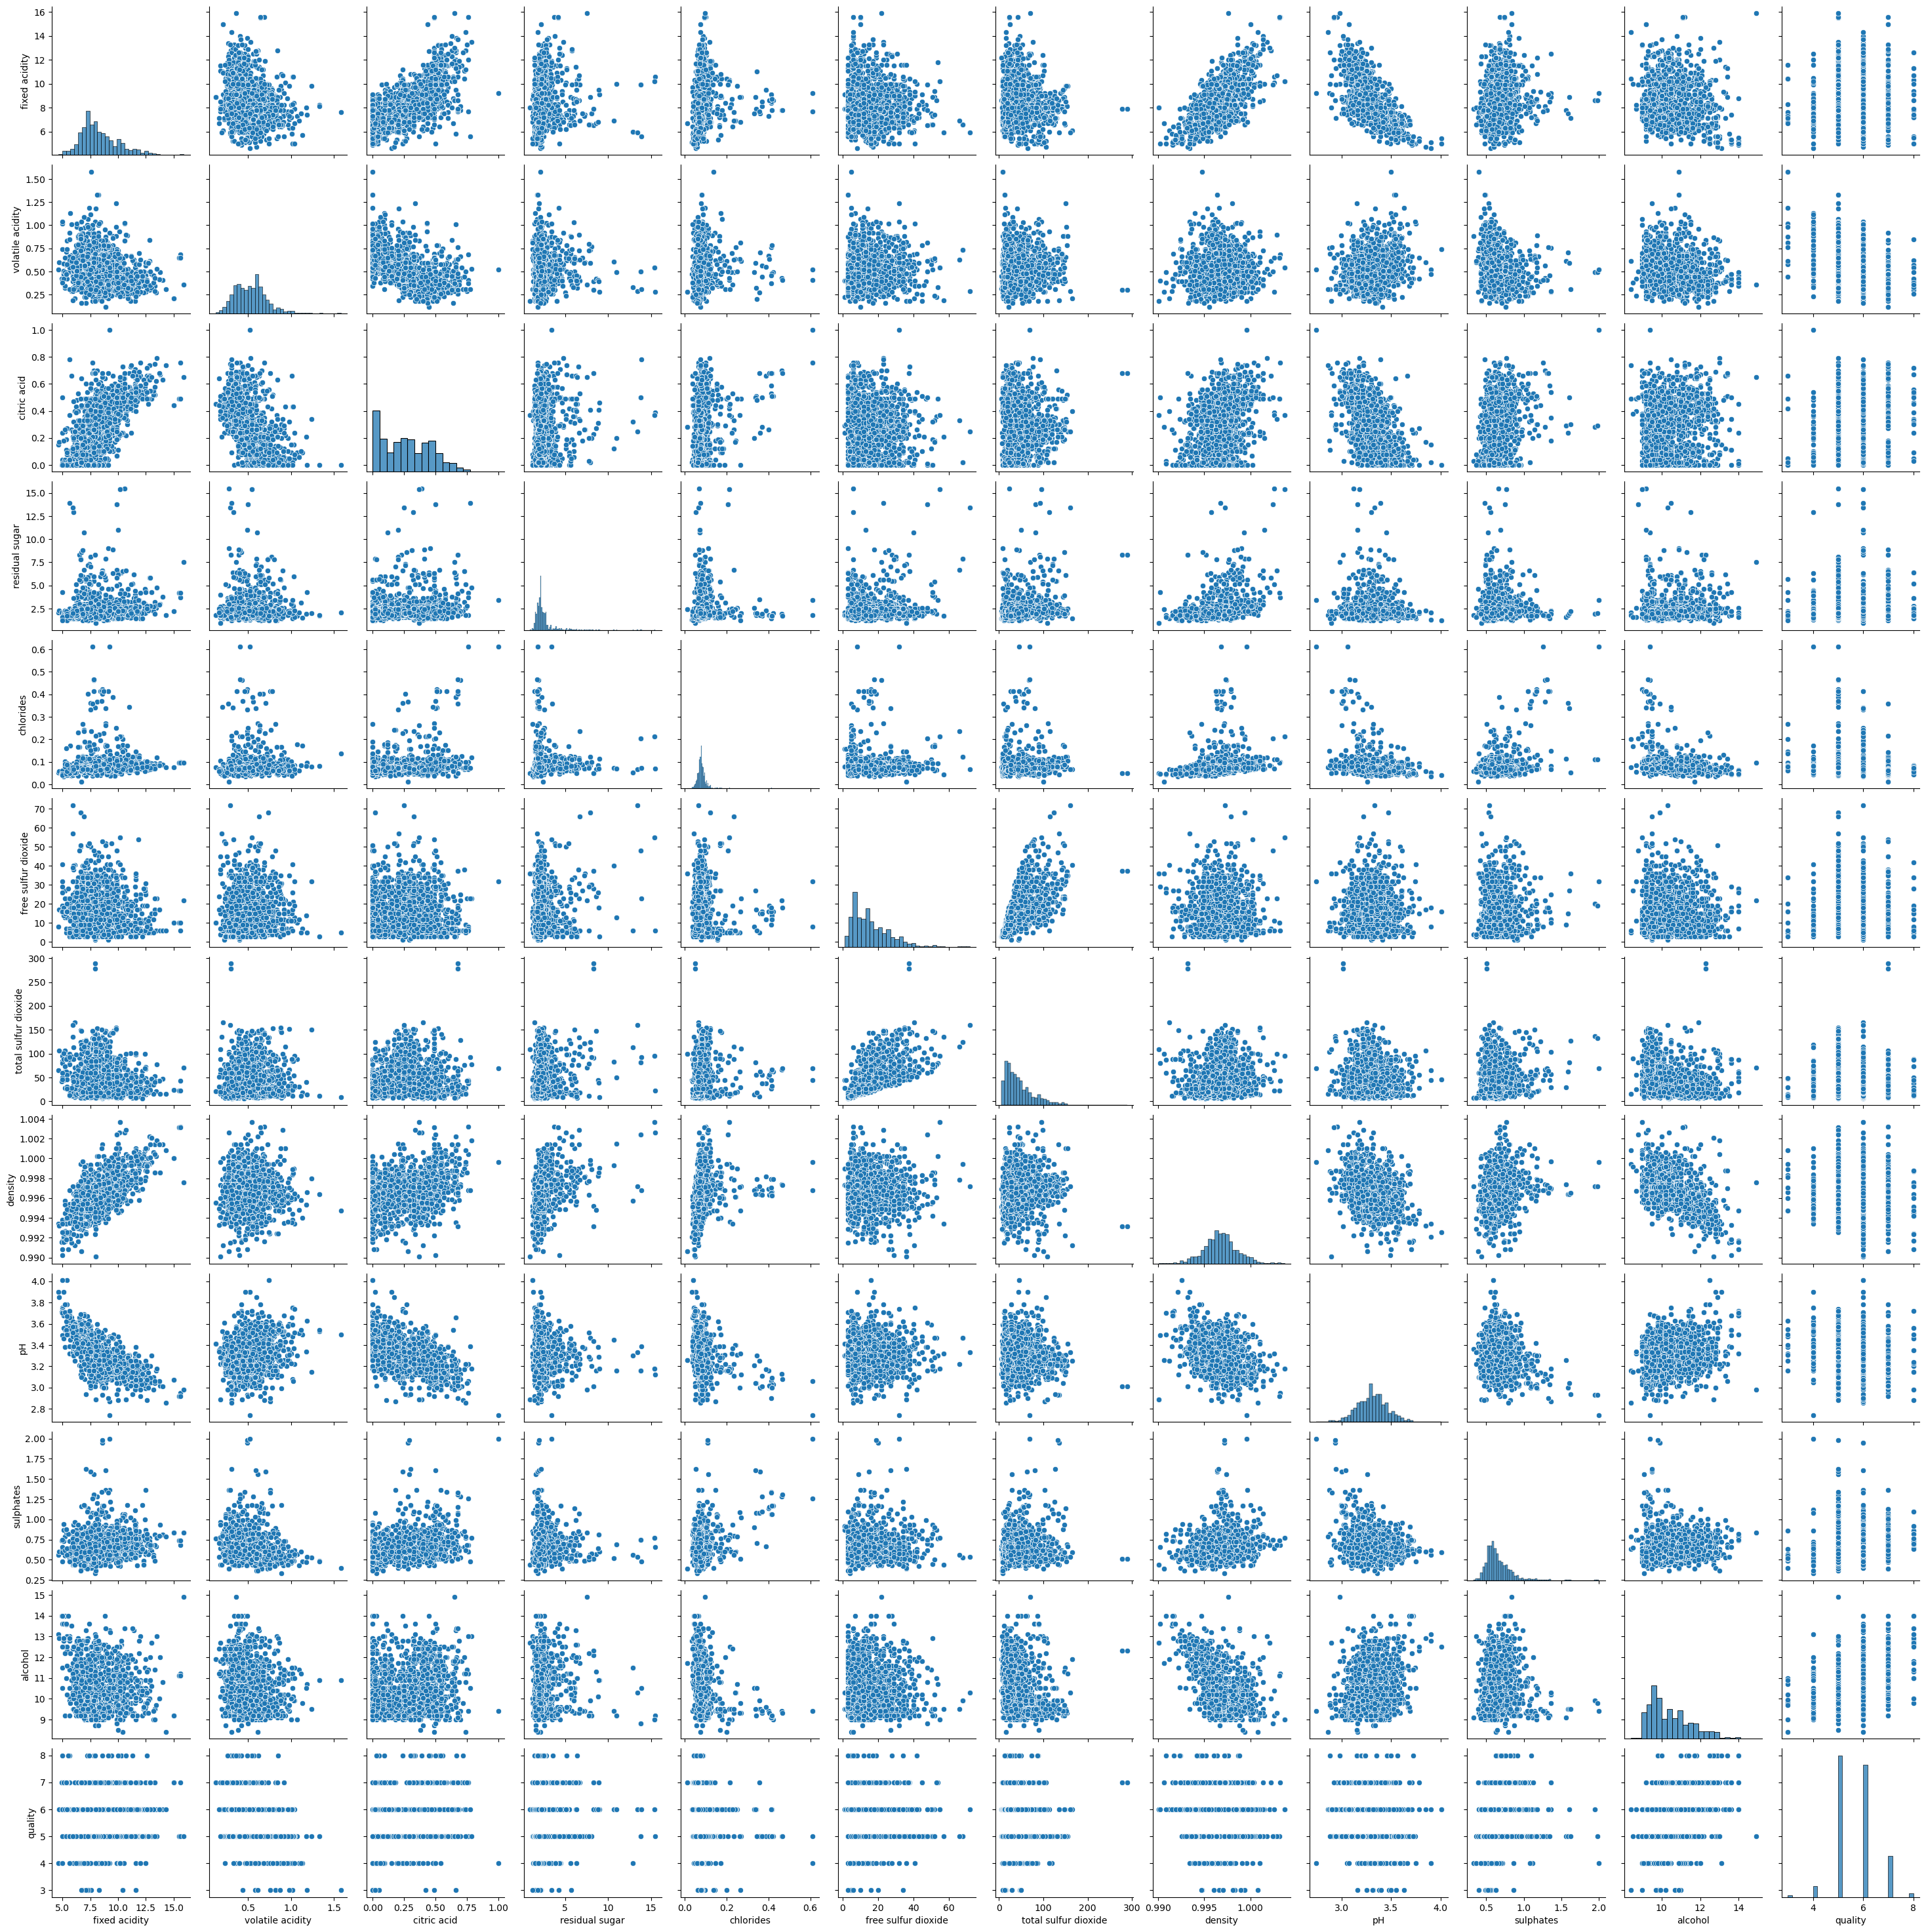

In [9]:
sns.pairplot(wine)

<AxesSubplot:>

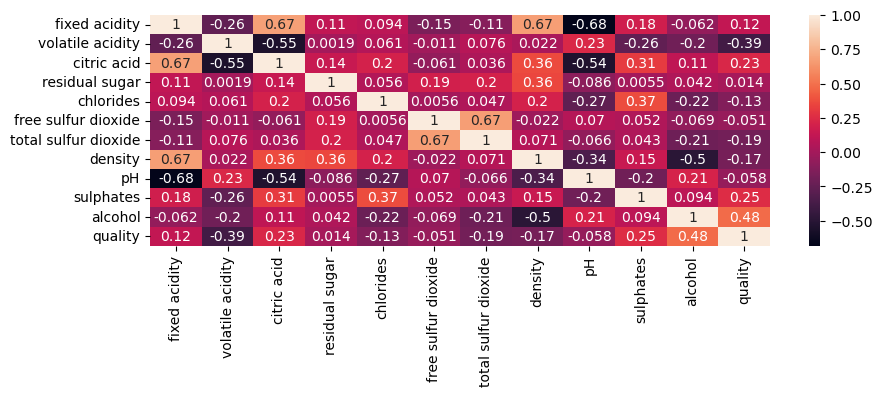

In [17]:
plt.figure(figsize=(10,3))
sns.heatmap(wine.corr(),annot=True)

In [154]:
winevar=wine.drop("quality",axis=1)

In [155]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be scaled
columns_to_scale = winevar.columns


# Perform Min-Max scaling on the selected columns
data_scaled = scaler.fit_transform(winevar[columns_to_scale])

# Create a new DataFrame with the scaled values
winescaled = pd.DataFrame(data_scaled, columns=columns_to_scale)

In [156]:
winescaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


----------------------------------------------------------------

CLUSTERING

In [157]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [158]:
linkage_matrix = linkage(winescaled, method='ward')  # You can choose different linkage methods such as 'ward', 'single', 'complete', etc.

In [159]:
linkage_matrix

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.35000000e+02, 2.36000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.18900000e+03, 3.19200000e+03, 6.59085040e+00, 5.63000000e+02],
       [3.19100000e+03, 3.19300000e+03, 7.79852107e+00, 1.03600000e+03],
       [3.19400000e+03, 3.19500000e+03, 1.17782616e+01, 1.59900000e+03]])

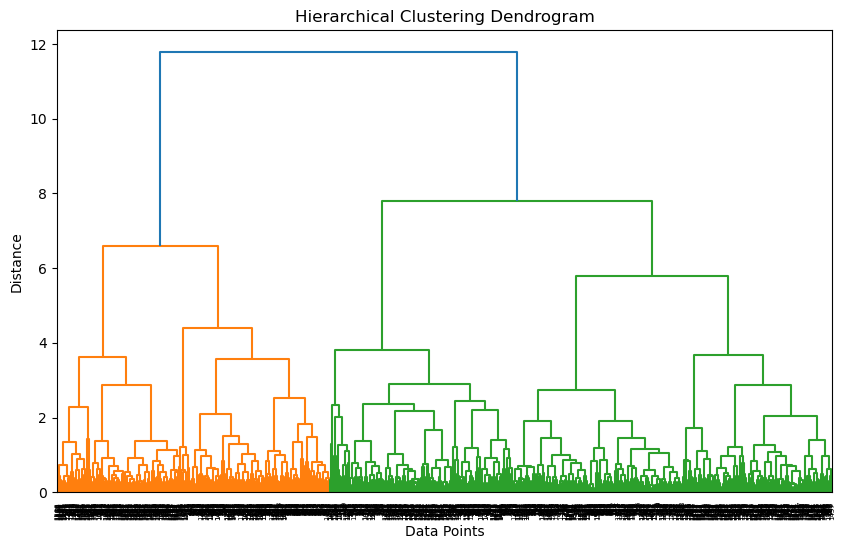

In [127]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [160]:
from scipy.cluster.hierarchy import fcluster

k = 5

clusters = fcluster(linkage_matrix, k, criterion='maxclust')  # You can also use 'distance' or 'inconsistent' criterion

In [161]:
winescaled['quality_cluster'] = clusters

In [364]:
winescaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cluster
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,5
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,5
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


In [365]:
cluster_means = winescaled.groupby('quality_cluster').mean()

# Find the two variables with the largest difference in means between clusters
best_variables = cluster_means.diff().abs().sum(axis=0).nlargest(2).index

In [366]:
best_variables

Index(['alcohol', 'fixed acidity'], dtype='object')

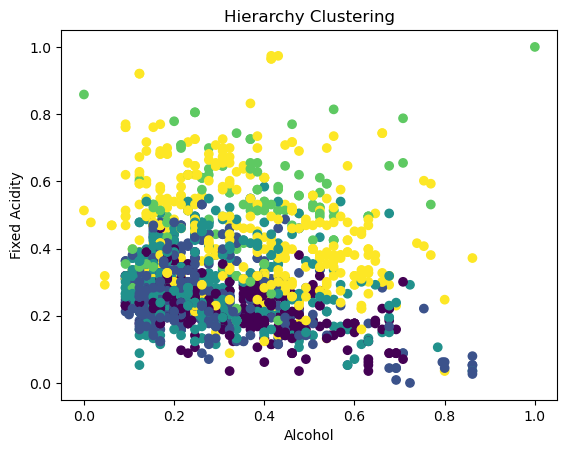

In [367]:
plt.scatter(winescaled['alcohol'], winescaled['fixed acidity'], c=clusters)
plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.title('Hierarchy Clustering')
plt.show()


In [47]:
#Let's perform FA

In [167]:
winescaled1=winescaled.drop("quality_cluster", axis=1)

In [169]:
winescaled1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [170]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_model = calculate_kmo(winescaled1)
print(kmo_model)#OUTPUT
kmom=pd.Series(kmo_model)

(array([0.44907725, 0.5216919 , 0.69709146, 0.20534306, 0.46494698,
       0.48446667, 0.45210338, 0.36591833, 0.44883405, 0.50929458,
       0.22946484]), 0.4320579646934834)


C:\Users\User\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [174]:
# Get a list of variables with KMO < 0.5
low_kmo_vars = kmom.apply(lambda a: a<0.5).sum()
#low_kmo_vars=np.array([True,False, False, True,True, True,True, True,True,False,True])

dfsin = winescaled1.loc[:, ~low_kmo_vars]

In [175]:
dfsin

,volatile acidity,citric acid,sulphates
0,0.397260,0.00,0.137725
1,0.520548,0.00,0.209581
2,0.438356,0.04,0.191617
3,0.109589,0.56,0.149701
4,0.397260,0.00,0.137725
...,...,...,...
1594,0.328767,0.08,0.149701
1595,0.294521,0.10,0.257485
1596,0.267123,0.13,0.251497
1597,0.359589,0.12,0.227545


In [176]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax',n_factors=1)
fa.fit(dfsin)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev>1

C:\Users\User\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([ True, False, False])

In [177]:
total_sum = sum(ev)
variance_explained = [(i / total_sum) * 100 for i in ev]
variance_explained

[58.90990681788444, 26.283017740207566, 14.807075441908]

In [178]:
load=pd.DataFrame(fa.loadings_, columns=["Factor1"], index=[dfsin.columns])
load

,Factor1
volatile acidity,-0.678985
citric acid,0.813708
sulphates,0.384377


In [110]:
#some EDA

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

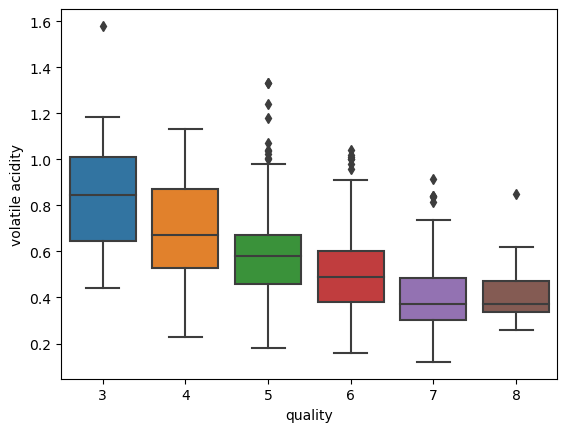

In [111]:
sns.boxplot(wine["quality"], wine["volatile acidity"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

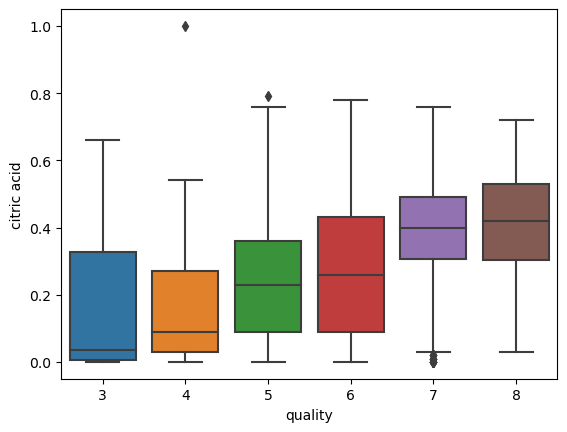

In [112]:
sns.boxplot(wine["quality"], wine["citric acid"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

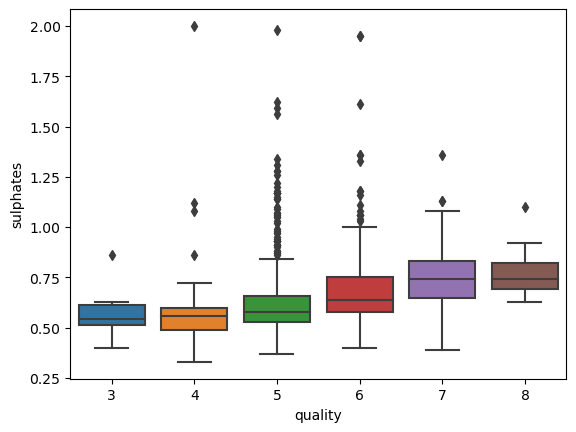

In [113]:
sns.boxplot(wine["quality"], wine["sulphates"])

In [ ]:
#we can conclude that higher quantity of sulphates and citric acids and lower volatile acidicy makes the wine better
#quality. Moreover, the more sulphates and citric acids the better quality and the less volatile acidicy the better quality.
#Having this in mind, the Factor 1 explains this phenomenon.

In [179]:
factor_scores = fa.transform(dfsin)
winescaled1[["acid_suph"]]=factor_scores[:, 0:1]  # Extract the scores for the first factor

In [180]:
winescaled1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,acid_suph
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1.209526
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,-1.447064
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,-1.131312
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.281312
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1.209526
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,-0.771670
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,-0.501309
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,-0.344380
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,-0.640294


In [181]:
newine=winescaled1.drop(["volatile acidity", "citric acid", "sulphates"], axis=1)

In [182]:
newine

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,acid_suph
0,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526
1,0.283186,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385,-1.447064
2,0.283186,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385,-1.131312
3,0.584071,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385,1.281312
4,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526
...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.323077,-0.771670
1595,0.115044,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.430769,-0.501309
1596,0.150442,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.400000,-0.344380
1597,0.115044,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.276923,-0.640294


<AxesSubplot:>

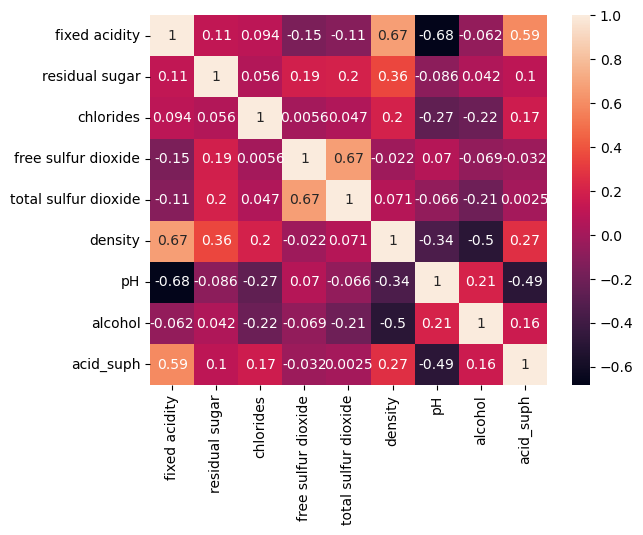

In [183]:
sns.heatmap(newine.corr(), annot=True)

In [184]:
linkage_matrix = linkage(newine, method='ward')  # You can choose different linkage methods such as 'ward', 'single', 'complete', etc.

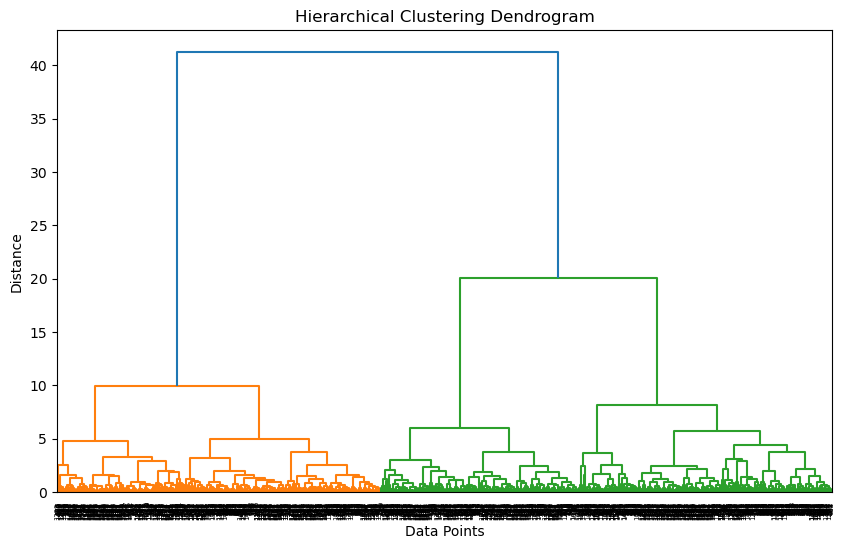

In [185]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [211]:
clusters = fcluster(linkage_matrix, k, criterion='maxclust')  # You can also use 'distance' or 'inconsistent' criterion

In [212]:
newine['quality_cluster'] = clusters

In [213]:
newine

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,acid_suph,quality_cluster
0,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1
1,0.283186,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385,-1.447064,1
2,0.283186,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385,-1.131312,1
3,0.584071,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385,1.281312,5
4,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1
...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.323077,-0.771670,1
1595,0.115044,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.430769,-0.501309,2
1596,0.150442,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.400000,-0.344380,3
1597,0.115044,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.276923,-0.640294,2


In [214]:
cluster_means = newine.groupby('quality_cluster').mean()

# Find the two variables with the largest difference in means between clusters
best_variables = cluster_means.diff().abs().sum(axis=0).nlargest(2).index

In [215]:
best_variables

Index(['acid_suph', 'fixed acidity'], dtype='object')

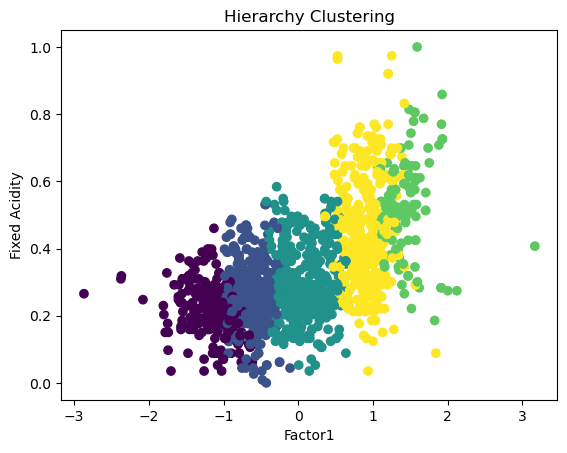

In [217]:
plt.scatter(newine['acid_suph'], newine['fixed acidity'], c=clusters)
plt.xlabel('Factor1')
plt.ylabel('Fixed Acidity')
plt.title('Hierarchy Clustering')
plt.show()

In [368]:
#non hierarchical clustering

In [369]:
from sklearn.cluster import KMeans

In [373]:
kmwine=newine.drop("quality_cluster", axis=1)

In [374]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(kmwine)

KMeans(n_clusters=5)

In [375]:
labels = kmeans.labels_

# Add the cluster labels to your original DataFrame
kmwine['cluster'] = labels

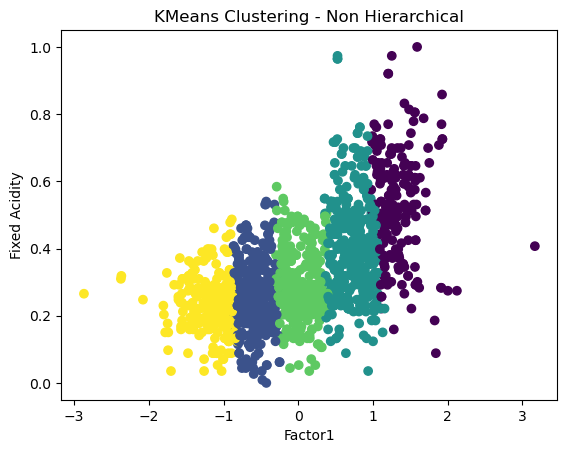

In [378]:
plt.scatter(kmwine['acid_suph'], kmwine['fixed acidity'], c=labels)
plt.xlabel('Factor1')
plt.ylabel('Fixed Acidity')
plt.title('KMeans Clustering - Non Hierarchical')
plt.show()

--------------------------------------

DISCRIMINANT ANALYSIS

1. Compute the Robust Covariance Matrix: Estimate the covariance matrix of each class using a robust estimator such as MCD. This estimation method is less sensitive to outliers compared to traditional covariance matrix estimation.


2. Compute the Overall Covariance Matrix: Combine the class-specific covariance matrices to obtain the overall covariance matrix. This matrix represents the covariance structure of the entire dataset, accounting for the differences between classes.


3. Compute the Robust Inverse of the Covariance Matrix: Calculate the inverse of the overall covariance matrix using a robust method. This step is necessary to compute the discriminant functions in the next step.


4. Compute the Robust Discriminant Functions: Calculate the discriminant functions based on the robust inverse covariance matrix. These functions will help assign new data points to the appropriate clusters.


5. Assign Cluster Labels: Assign cluster labels to each data point based on the discriminant functions. The data point is assigned to the cluster with the highest discriminant function value.

In [193]:
from scipy.stats import shapiro, bartlett


# Step 1: Separate the data by cluster labels
clusters = newine['quality_cluster'].unique()
cluster_data = {}

for cluster in clusters:
    cluster_data[cluster] = newine[newine['quality_cluster'] == cluster]


In [194]:
#Check assumptions - Normality of predictor variables
for column in newine.columns:
    if column != 'quality_cluster':
        for cluster, cluster_df in cluster_data.items():
            _, p_value = shapiro(cluster_df[column])
            print(f"{column}: Cluster {cluster} p-value = {p_value:.4f}")


fixed acidity: Cluster 1 p-value = 0.0558
fixed acidity: Cluster 5 p-value = 0.0000
fixed acidity: Cluster 2 p-value = 0.0028
fixed acidity: Cluster 3 p-value = 0.0000
fixed acidity: Cluster 4 p-value = 0.1483
residual sugar: Cluster 1 p-value = 0.0000
residual sugar: Cluster 5 p-value = 0.0000
residual sugar: Cluster 2 p-value = 0.0000
residual sugar: Cluster 3 p-value = 0.0000
residual sugar: Cluster 4 p-value = 0.0000
chlorides: Cluster 1 p-value = 0.0000
chlorides: Cluster 5 p-value = 0.0000
chlorides: Cluster 2 p-value = 0.0000
chlorides: Cluster 3 p-value = 0.0000
chlorides: Cluster 4 p-value = 0.0000
free sulfur dioxide: Cluster 1 p-value = 0.0000
free sulfur dioxide: Cluster 5 p-value = 0.0000
free sulfur dioxide: Cluster 2 p-value = 0.0000
free sulfur dioxide: Cluster 3 p-value = 0.0000
free sulfur dioxide: Cluster 4 p-value = 0.0000
total sulfur dioxide: Cluster 1 p-value = 0.0000
total sulfur dioxide: Cluster 5 p-value = 0.0000
total sulfur dioxide: Cluster 2 p-value = 0.000

In [197]:
import pingouin as pg

# Assuming your predictor variables are stored in a DataFrame called 'data'
# Extract the predictor variables into a separate DataFrame
predictor_data = newine.drop("quality_cluster", axis=1)

# Perform multivariate normality test
result = pg.multivariate_normality(predictor_data)

# Print the results
result

HZResults(hz=7.019633882217252, pval=0.0, normal=False)

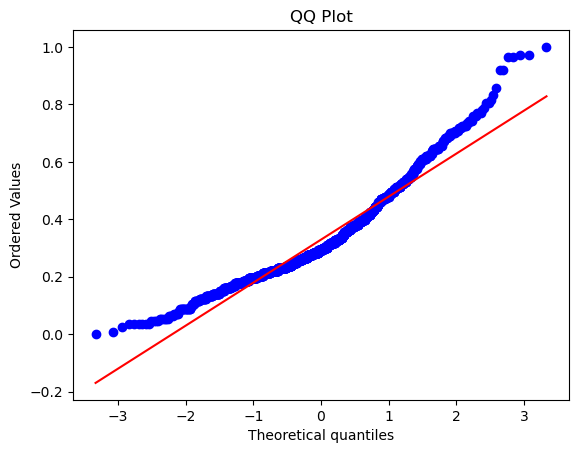

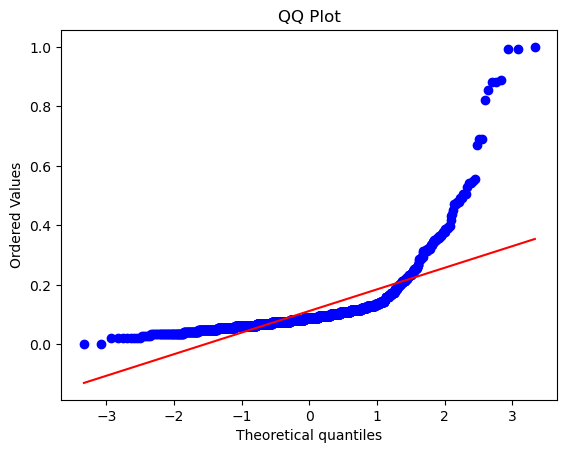

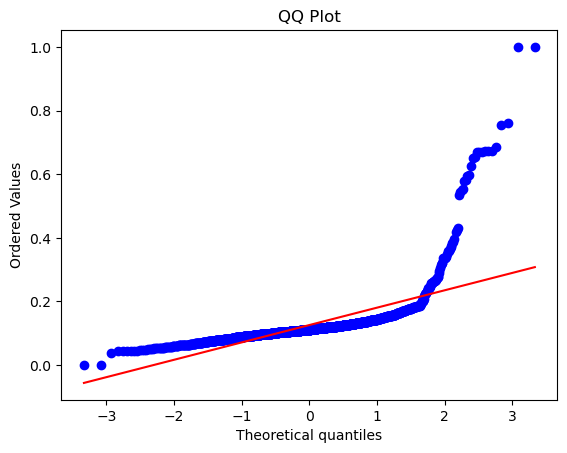

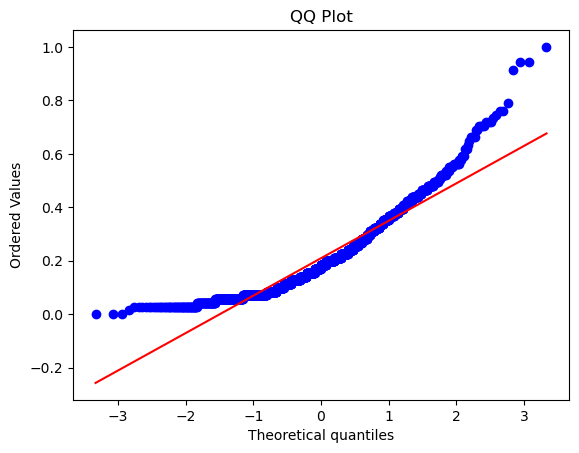

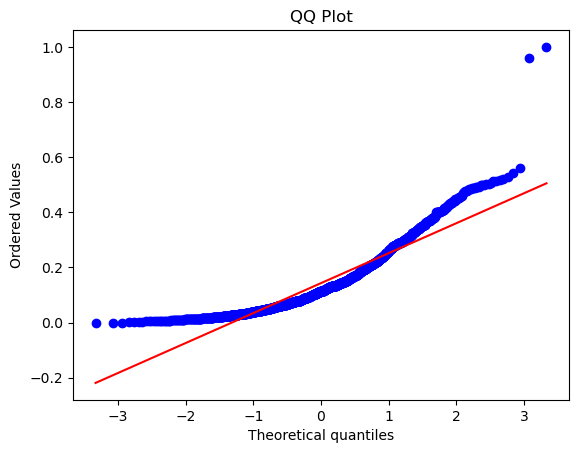

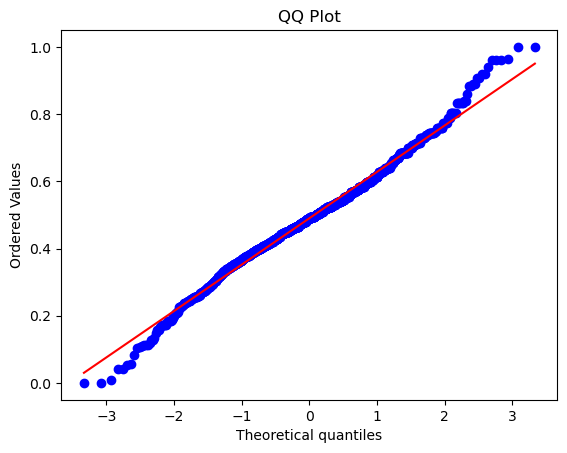

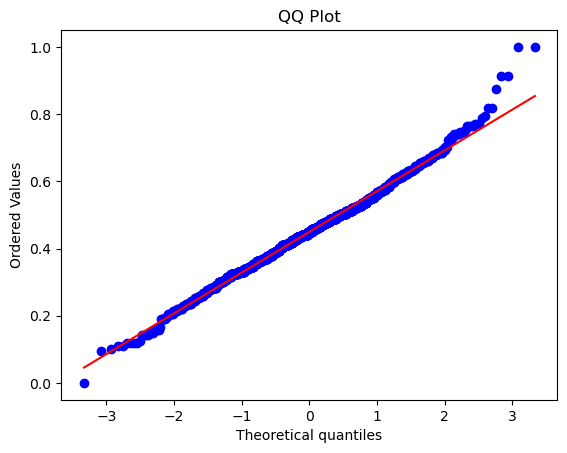

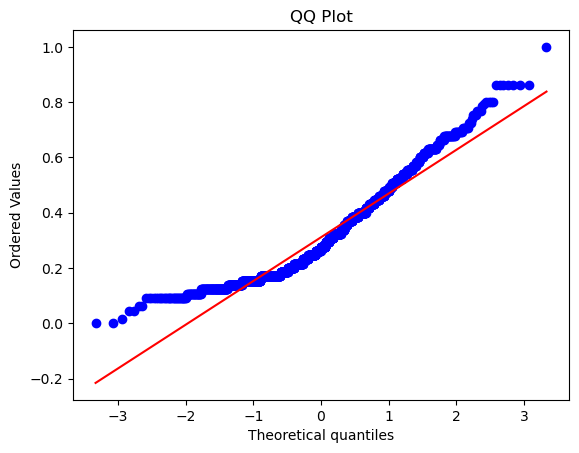

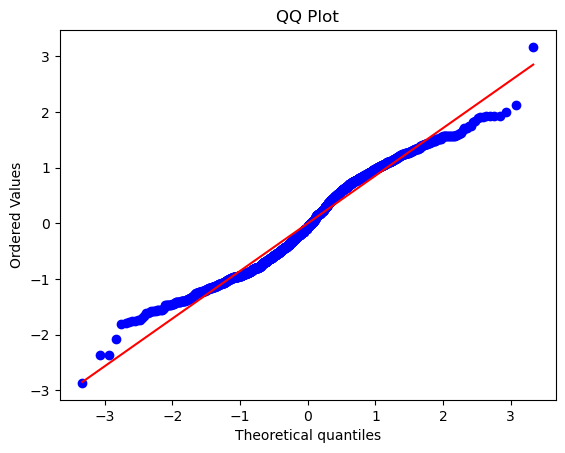

In [202]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for variable in newine.columns:
    if variable!="quality_cluster":
        stats.probplot(newine[variable], dist="norm", plot=plt)
        plt.title("QQ Plot")
        plt.show()


In [218]:
newine

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,acid_suph,quality_cluster
0,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1
1,0.283186,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385,-1.447064,1
2,0.283186,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385,-1.131312,1
3,0.584071,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385,1.281312,5
4,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1
...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.323077,-0.771670,1
1595,0.115044,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.430769,-0.501309,2
1596,0.150442,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.400000,-0.344380,3
1597,0.115044,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.276923,-0.640294,2


In [288]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.covariance import MinCovDet

In [289]:
# Split the data into training and testing sets
X=newine.drop("quality_cluster", axis=1)
y=newine["quality_cluster"]

In [290]:
robust_cov = MinCovDet().fit(X)

In [292]:
robust_inv_cov = pd.DataFrame(np.linalg.inv(robust_cov.covariance_), index=X.columns, columns=X.columns)

In [294]:
rda = QuadraticDiscriminantAnalysis(store_covariance=True)
rda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [295]:
cluster_labels = rda.predict(X)

In [297]:
disc_clust=pd.Series(cluster_labels)

In [298]:
disc_clust.value_counts()

5    399
2    399
3    389
1    273
4    139
dtype: int64

In [336]:
from sklearn import metrics

# Assuming 'labels' are the predicted labels from RDA

# Dunn Index
dunn_index = metrics.davies_bouldin_score(X, clusters)

# Davies-Bouldin Index
davies_bouldin_index = metrics.davies_bouldin_score(X, clusters)

# Calinski-Harabasz Index
calinski_harabasz_index = metrics.calinski_harabasz_score(X, disc_clust)


In [342]:
davies_bouldin_index

1.2691899958453667

In [343]:
metrics.davies_bouldin_score(X, disc_clust)

1.3354507236778732

In [339]:
calinski_harabasz_index

1532.2350118379948

In [340]:
metrics.calinski_harabasz_score(X, clusters)

1607.8855883426347

In [303]:
y.value_counts()

3    408
2    404
5    400
1    264
4    123
Name: quality_cluster, dtype: int64

In [357]:
newine_disc=pd.concat([newine,disc_clust], axis=1)

In [358]:
newine_disc=newine_disc.rename(columns={0: "quality_disc"})

In [359]:
newine_disc

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,acid_suph,quality_cluster,quality_disc
0,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1,1
1,0.283186,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385,-1.447064,1,1
2,0.283186,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385,-1.131312,1,1
3,0.584071,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385,1.281312,5,5
4,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.323077,-0.771670,1,1
1595,0.115044,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.430769,-0.501309,2,1
1596,0.150442,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.400000,-0.344380,3,1
1597,0.115044,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.276923,-0.640294,2,2


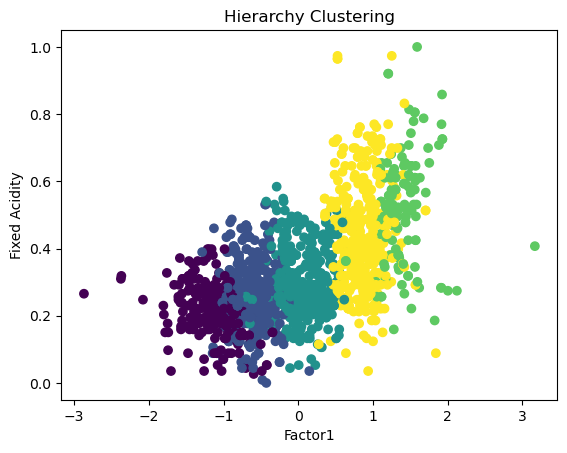

In [307]:
plt.scatter(newine_disc['acid_suph'], newine_disc['fixed acidity'], c=disc_clust)
plt.xlabel('Factor1')
plt.ylabel('Fixed Acidity')
plt.title('Hierarchy Clustering')
plt.show()

In [312]:
1599-sum(newine_disc["quality_cluster"]==newine_disc['quality_disc'])

139

In [345]:
from sklearn.metrics import silhouette_score

In [346]:
silhouette_before = silhouette_score(X, clusters)
print("Silhouette Score before Discriminant Analysis:", silhouette_before)

Silhouette Score before Discriminant Analysis: 0.22912779249965617


In [347]:
silhouette_before = silhouette_score(X, disc_clust)
print("Silhouette Score after Discriminant Analysis:", silhouette_before)

Silhouette Score after Discriminant Analysis: 0.21614135159608186


In [348]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [349]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [350]:
new_labels = lda.predict(X)

In [352]:
lda_labels=pd.Series(new_labels)

In [353]:
silhouette_before = silhouette_score(X, lda_labels)
print("Silhouette Score with Linear Discriminant Analysis:", silhouette_before)

Silhouette Score with Linear Discriminant Analysis: 0.24871419456800453


In [360]:
newine_disc=pd.concat([newine_disc,lda_labels], axis=1)

In [361]:
newine_disc

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,acid_suph,quality_cluster,quality_disc,0
0,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1,1,1
1,0.283186,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385,-1.447064,1,1,1
2,0.283186,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385,-1.131312,1,1,1
3,0.584071,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385,1.281312,5,5,5
4,0.247788,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846,-1.209526,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.323077,-0.771670,1,1,2
1595,0.115044,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.430769,-0.501309,2,1,2
1596,0.150442,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.400000,-0.344380,3,1,2
1597,0.115044,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.276923,-0.640294,2,2,2


In [362]:
newine_disc=newine_disc.rename(columns={0: "quality_lda"})

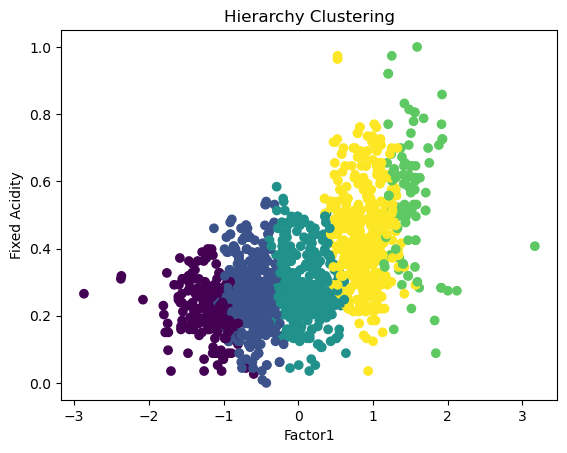

In [363]:
plt.scatter(newine_disc['acid_suph'], newine_disc['fixed acidity'], c=lda_labels)
plt.xlabel('Factor1')
plt.ylabel('Fixed Acidity')
plt.title('Hierarchy Clustering')
plt.show()

In [ ]:
#even though we couldn't accept multilinear normality, the LDA made the clusters a little but better (more compact).
#Bear in mind that the clusters are very close to each other, so it's difficult to achieve perfect distinction between them.